In [86]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
All_School_List = pd.read_csv('Data/All_School_List.csv')
Migrant_School_List = pd.read_csv('Data/Migrant_School_List.csv')
All_School_List.head(1)

,Unnamed: 0,Mean Scale Score,County Name,School Code,District Code,Zip Code,District Name,Total_Students,Per_Student_Spending,Median,Mean,Pop,YearsTeaching,Enrolled,Utilized,Percent_Eligible,Percent_Utilized,Sanctuary
0,0,2674.8,El Dorado,930081,61853,95762,El Dorado Union High,6285.33,11118.34,114420.0,135015.0,38797.0,16.346939,2457,190,0.08,0.07733,0.0


How does per pupil spending relate to the scores as compared to area average income

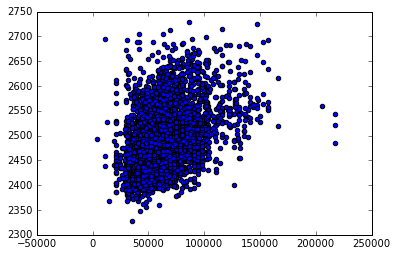

In [88]:
#relationship between Median Income and Test scores
_=plt.scatter(All_School_List['Median'],All_School_List['Mean Scale Score'])

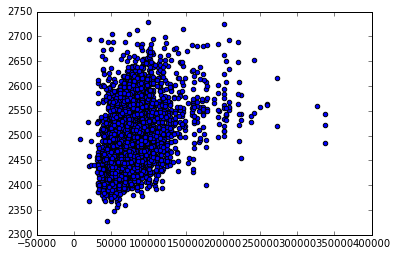

In [89]:
#relationship between Mean Income and Test scores
_=plt.scatter(All_School_List['Mean'],All_School_List['Mean Scale Score'])

There is clearly some correlation between area income and test scores. Both Charts so show a slight positive relationship between Area Income and test scores. The main thing this shows is that there is more variation between members of the same income bracket than between the two extremes of income brackets. This indicates that these demographics may have an effect on test scores but there are clearly other stronger determining factors. 

Now Compare the ralation ship of area income to the corrlation of direct pupil spending

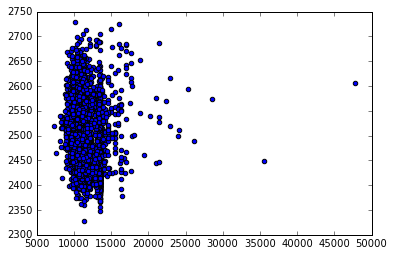

In [90]:
_=plt.scatter(All_School_List['Per_Student_Spending'],All_School_List['Mean Scale Score'])

This would indicate that although there seems to be a slight correlation between per pupil spending and test scores, per pupil spending is less correlated with test scores than either measures of area income.

here it is investigated whether the school meal programs are a predictor of test scores. The ideas behind these programs would indicate that for schools with similiar percentages of eligibile students, the school with the greater amount of meal assistance utilized will have on average improved educational outcomes.

To Test This, Select the group of schools with the highest eligibility, call that group at risk. further subdivide that group into optimal utilizers and sub-opptimal utilizers. If the idea behind these programs holds true we might expect to see a difference in these two groups.

In [91]:
At_Risk = All_School_List[All_School_List['Percent_Eligible']>np.percentile(All_School_List['Percent_Eligible'],90 )]                                                                         
Optimal_Utilizer = At_Risk[At_Risk['Percent_Utilized']>np.percentile(At_Risk['Percent_Utilized'],90)]
Sub_Utilizer = At_Risk[At_Risk['Percent_Utilized']<np.percentile(At_Risk['Percent_Utilized'],10)]

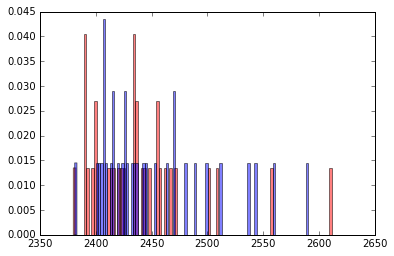

In [92]:
_ = plt.hist(Optimal_Utilizer['Mean Scale Score'],bins = 100,color ='red',alpha=.5,normed =True)
_ = plt.hist(Sub_Utilizer['Mean Scale Score'],bins =100,color = 'blue',alpha = .5,normed = True)
plt.show()

That Diagram is not as clear as would be helpful to answer our question, thsi could be a great opertunity to display a bootstrapped sample to estimate the two distributions



In [93]:
BS_Optimal = np.empty(1000)
BS_Sub = np.empty(1000)
for i in range(1000):
    BS_Optimal[i] = np.mean(np.random.choice(Optimal_Utilizer['Mean Scale Score'],size=10))
    BS_Sub[i] = np.mean(np.random.choice(Sub_Utilizer['Mean Scale Score'],size=10))
    



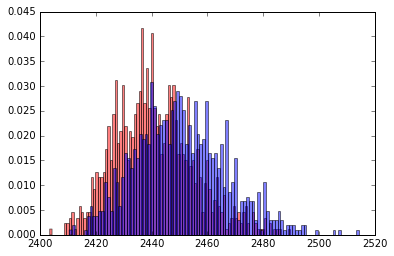

In [94]:
_ = plt.hist(BS_Optimal,bins = 100,color ='red',alpha=.5,normed =True)
_ = plt.hist(BS_Sub,bins =100,color = 'blue',alpha = .5,normed = True)

This implies the relationship between Food Aid and test scores may work differently than anticipated. A possible explaination is that, we are fairly certain that eligibility for this program correlates to poverty. However, it is possible by tracking under utilization of assistance as indicative of failing to povide a service to that school, that we have failed to recognize that under utilization could be an indicator of a less severe poverty.

Examine the years teaching column, is there a relationship between the level of experienced teachers the school is capable of retaining and the students test score. There is a general consesus that proffesionals become more skilled with expeience. By this virtue, it seems reasonable to investiagte whether the average number of years spent teaching would correlate with test scores

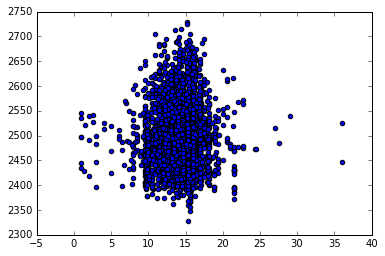

In [95]:
_=plt.scatter(All_School_List['YearsTeaching'],All_School_List['Mean Scale Score'])

This shows three points,

1. most schools are mix of young and old teacher, very few fall at age extremes. it is likely that those that do are very small
2. The Districts at the extremes of age distribution seem to do worse than average.
3. it seems posible but would require more testing that optimal scores are more likely near the mean